# Top Spotify Songs 2023 Data Analysis
Link to Dataset on Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

## Importing libraries

In [368]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load data and get general info of dataset

In [369]:
data = pd.read_csv('spotify2023.csv', encoding='ISO-8859-1')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [370]:
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Dropping unnecessary columns

In [371]:
#Dropping columns that are not needed
data.drop(columns=['bpm', 'key', 'mode'], inplace=True)
#Dropping cause has empty observations but also not really gonna need
data.drop(columns=['in_shazam_charts'], inplace=True)
#ALso only oneed apple & spotify data
data.drop(columns=['in_deezer_playlists', 'in_deezer_charts'], inplace=True)

### Change 'streams' column data type to int

In [372]:
#Drop row with incorrect value in 'streams' column
data.drop(574,axis=0,inplace=True)

In [373]:
data['streams'] = data['streams'].astype(int)

## Distribution of artist count

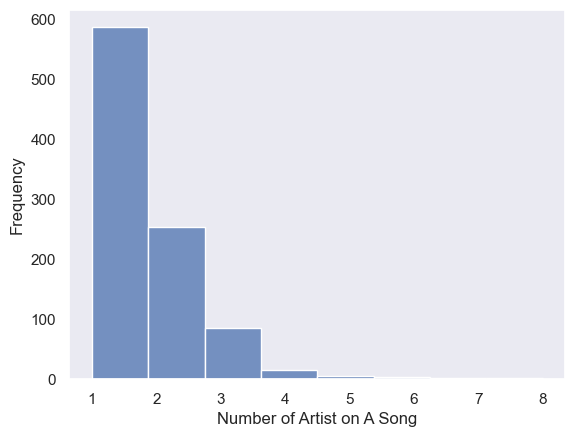

In [374]:
sns.set(style="dark")

sns.histplot(data['artist_count'], bins= 8)
plt.xlabel('Number of Artist on A Song')
plt.ylabel('Frequency')
plt.show()

## Distribution of the months that songs were released

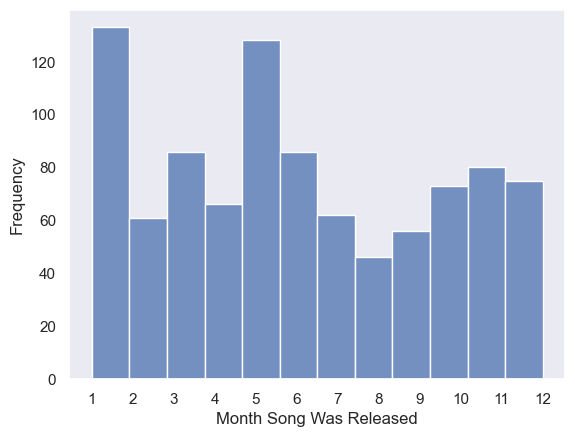

In [375]:
sns.histplot(data['released_month'], bins = 12)
plt.xlabel('Month Song Was Released')
plt.xticks(range(1, 13))
plt.ylabel('Frequency')
plt.show()

## Distribution of the day of the month that songs were released

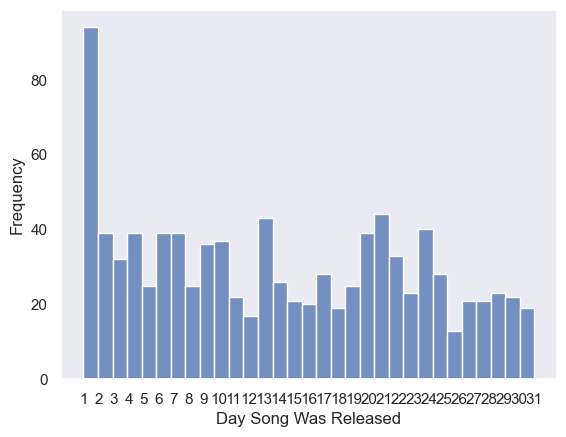

In [376]:
sns.histplot(data['released_day'], bins = 31)
plt.xlabel('Day Song Was Released')
plt.xticks(range(1, 32))
plt.ylabel('Frequency')
plt.show()

## How many songs were released in each year

In [377]:
y = data.groupby('released_year').size().reset_index(name = 'Songs Released')
print(y)

    released_year  Songs Released
0            1930               1
1            1942               1
2            1946               1
3            1950               1
4            1952               1
5            1957               2
6            1958               3
7            1959               2
8            1963               3
9            1968               1
10           1970               1
11           1971               1
12           1973               1
13           1975               2
14           1979               1
15           1982               2
16           1983               1
17           1984               4
18           1985               2
19           1986               2
20           1987               1
21           1991               2
22           1992               1
23           1994               1
24           1995               2
25           1996               1
26           1997               1
27           1998               1
28           1

## Top 10 Most Streamed Songs

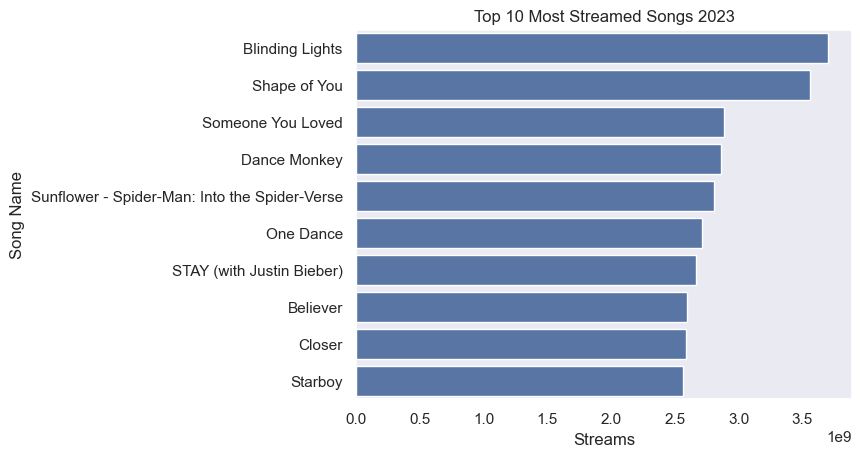

In [378]:
top10songs = data.sort_values(by='streams', ascending=False).iloc[:10, :]
#print(top10.info())
sns.barplot(x = top10songs['streams'], y = top10songs['track_name'])
plt.title('Top 10 Most Streamed Songs 2023')
plt.xlabel('Streams')
plt.ylabel('Song Name')
plt.show()

## Top 10 Artists w most songs

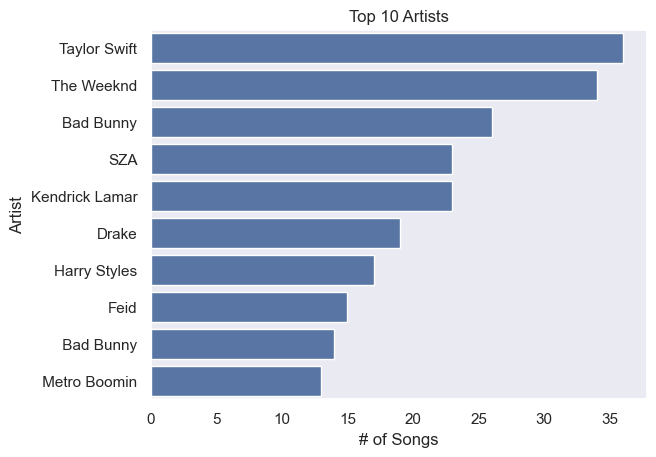

In [379]:
artists = data['artist(s)_name']
artist = []
for a in artists:
    temp = a.split(',')
    for i in temp:
        artist.append(i)

top10artists = pd.DataFrame(artist, columns=['Artist']).value_counts().reset_index(name = '# of Songs').iloc[:10, :]

sns.barplot(x = top10artists['# of Songs'], y = top10artists['Artist'])
plt.title('Top 10 Artists')
plt.show()

## Relationship btw the number of playlists the song is in and streams - Spotify

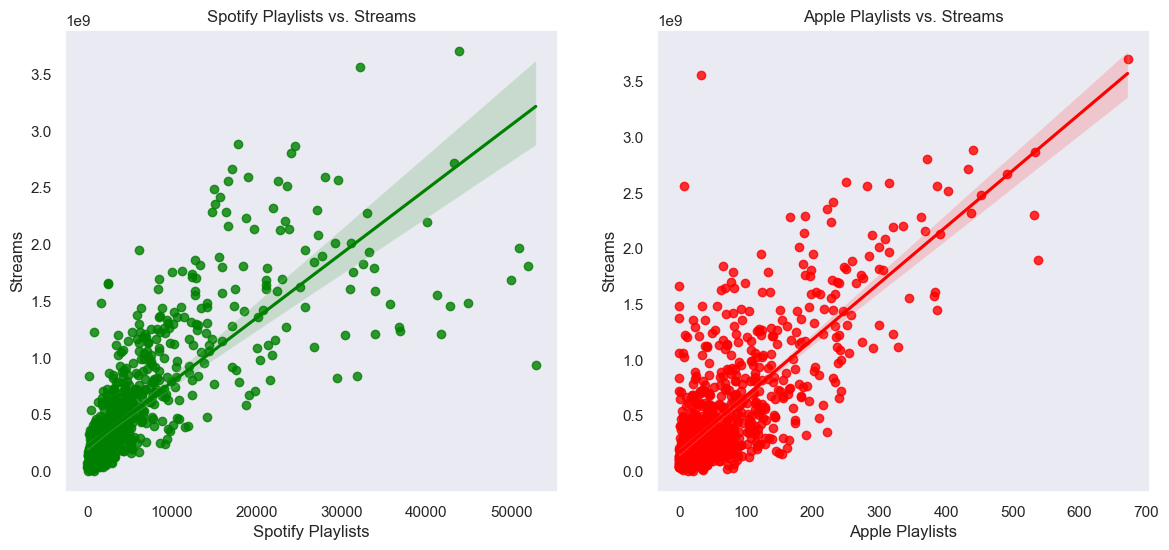

In [380]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x = data['in_spotify_playlists'], y = data['streams'], color='green')
plt.title('Spotify Playlists vs. Streams')
plt.xlabel('Spotify Playlists')
plt.ylabel('Streams')

plt.subplot(1, 2, 2)
sns.regplot(x = data['in_apple_playlists'], y = data['streams'], color='red')
plt.title('Apple Playlists vs. Streams')
plt.xlabel('Apple Playlists')
plt.ylabel('Streams')
plt.show()

## Correlation matrix of dataset

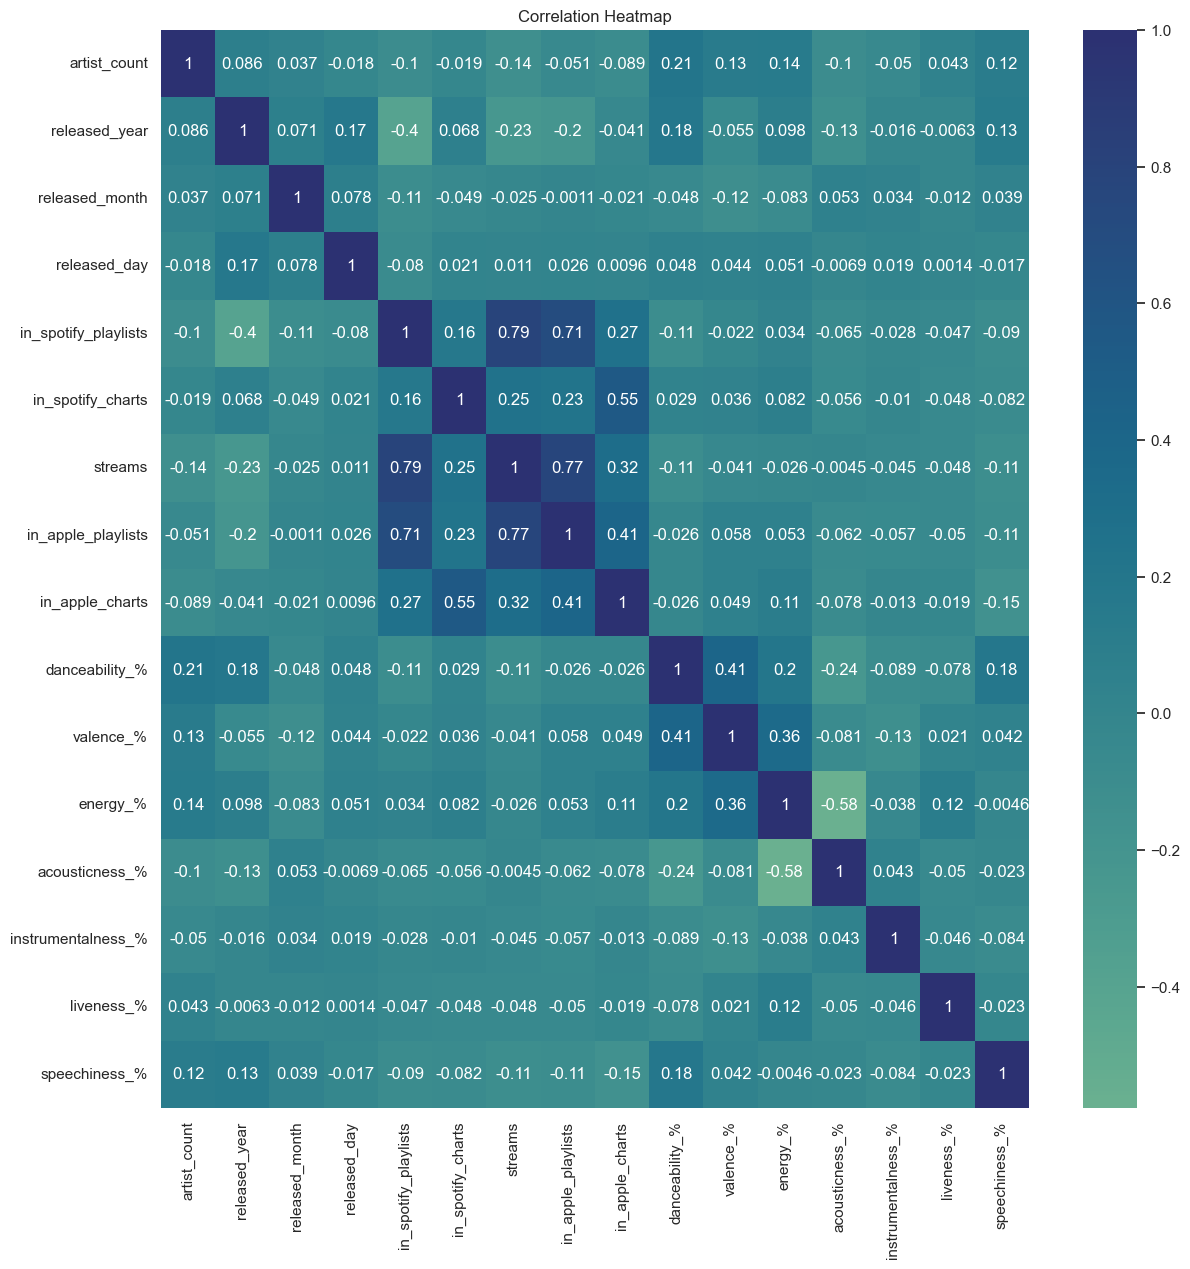

In [381]:
corre = data.corr(numeric_only = True)
                  
plt.figure(figsize=(14, 14))

sns.heatmap(corre, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Linear Regression Model to Predict Streams

In [382]:
my_features = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']
target = ['streams']

X = data[my_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_predicted = lr.predict(X_test)
print('Model Accuracy: ', round(r2_score(y_test, y_predicted), 3) * 100, '%')

Model Accuracy:  68.0 %
